In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
# from keras.models import Model
# from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# import tensorflow.python.util.deprecation as deprecation
# deprecation._PRINT_DEPRECATION_WARNINGS = False


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [3]:
with open('mnist.pkl', 'rb') as f:
    images = pickle.load(f)['images']

In [4]:
images = images / 255.

In [5]:
images = images.reshape((-1, 28, 28, 1))

In [10]:
input_layer = Input(shape=(28, 28, 1,))

In [11]:
hidden_encoding = Conv2D(
    16, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='relu',
    padding='same', # How to apply the weights to the images
)(input_layer)

In [13]:
encoded = MaxPooling2D((2, 2))(hidden_encoding)

In [18]:
hidden_decoding = Conv2D(
    16, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='relu',
    padding='same', # How to apply the weights to the images
)(encoded)

In [22]:
upsample_decoding = UpSampling2D((2, 2))(hidden_decoding)

In [26]:
decoded = Conv2D(
    1, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='sigmoid',
    padding='same', # How to apply the weights to the images
)(upsample_decoding)

In [28]:
autoencoder = Model(input_layer, decoded)

In [29]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
___________________________________________________________

In [30]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

In [31]:
autoencoder.fit(images, images, epochs=20)

Train on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 15s 1ms/sample - loss: 0.6952
Epoch 2/20
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.6925
Epoch 3/20
10000/10000 [==============================] - 14s 1ms/sample - loss: 0.6894
Epoch 4/20
10000/10000 [==============================] - 13s 1ms/sample - loss: 0.6859
Epoch 5/20
10000/10000 [==============================] - 14s 1ms/sample - loss: 0.6819
Epoch 6/20
10000/10000 [==============================] - 14s 1ms/sample - loss: 0.6775
Epoch 7/20
10000/10000 [==============================] - 14s 1ms/sample - loss: 0.6725
Epoch 8/20
10000/10000 [==============================] - 14s 1ms/sample - loss: 0.6667
Epoch 9/20
10000/10000 [==============================] - 14s 1ms/sample - loss: 0.6598
Epoch 10/20
10000/10000 [==============================] - 14s 1ms/sample - loss: 0.6515
Epoch 11/20
10000/10000 [==============================] - 14s 1ms/sample - loss: 0.6416
Epoch 1

In [34]:
encoder_output = Model(input_layer, encoded).predict(images[:5])

In [35]:
encoder_output = encoder_output.reshape((-1, 14 * 14, 16))

In [36]:
decoder_output = autoencoder.predict(images[:5])

In [37]:
decoder_output = decoder_output.reshape((-1, 28, 28))

In [38]:
images = images.reshape((-1, 28, 28))

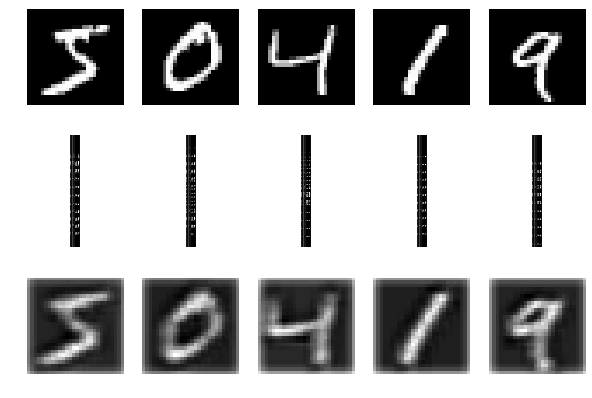

In [39]:
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot original digit images
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    # Plot the encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    # Plot the decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')        

In [40]:
# Unit test

In [43]:
import unittest
class TestAutoEncoderMNIST(unittest.TestCase):   
        
    def test_images(self):
        self.assertEqual(len(images),10000)
        
    def test_input_layer_shape(self):
        self.assertListEqual(list(input_layer.shape),[None, 28, 28, 1])
        
    def test_hidden_encoding_shape(self):
        self.assertListEqual(list(hidden_encoding.shape),[None, 28, 28, 16])
        
    def test_encoded(self):
        self.assertListEqual(list(encoded.shape),[None, 14, 14, 16])
        
    def test_hidden_decoding_shape(self):
        self.assertListEqual(list(hidden_decoding.shape),[None, 14, 14, 16])
        
    def test_upsample_decoding_shape(self):
        self.assertListEqual(list(upsample_decoding.shape),[None, 28, 28, 16])
        
        
    def test_decoded(self):
        self.assertListEqual(list(decoded.shape),[None, 28, 28, 1])
        
        
    def test_encoder_output_len(self):
        self.assertEqual(len(encoder_output),5)
        
    def test_decoder_output_len(self):
        self.assertEqual(len(decoder_output),5)
        
         

In [44]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestAutoEncoderMNIST)
unittest.TextTestRunner(verbosity=2).run(suite)

test_decoded (__main__.TestAutoEncoderMNIST) ... ok
test_decoder_output_len (__main__.TestAutoEncoderMNIST) ... ok
test_encoded (__main__.TestAutoEncoderMNIST) ... ok
test_encoder_output_len (__main__.TestAutoEncoderMNIST) ... ok
test_hidden_decoding_shape (__main__.TestAutoEncoderMNIST) ... ok
test_hidden_encoding_shape (__main__.TestAutoEncoderMNIST) ... ok
test_images (__main__.TestAutoEncoderMNIST) ... ok
test_input_layer_shape (__main__.TestAutoEncoderMNIST) ... ok
test_upsample_decoding_shape (__main__.TestAutoEncoderMNIST) ... ok

----------------------------------------------------------------------
Ran 9 tests in 0.015s

OK


<unittest.runner.TextTestResult run=9 errors=0 failures=0>